In [1]:
# img = Image.open("/home/soujanya/Downloads/standard_test_images/cameraman.tif")

# display(img)


In [3]:
from PIL import Image
import numpy as np
import os
from scipy.fftpack import idct 
from scipy.fftpack import dct 
import matplotlib.pyplot as plt

In [4]:
img = Image.open("/home/soujanya/Downloads/standard_test_images/cameraman.tif")
img = img.convert('L') 
img_array = np.array(img)

section_size = 8
num_sections = (img_array.shape[0] // section_size) * (img_array.shape[1] // section_size)


output_dir = "sections"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


section_number = 1
sections = []
for i in range(0, img_array.shape[0], section_size):
    for j in range(0, img_array.shape[1], section_size):
        section = img_array[i:i+section_size, j:j+section_size]
        sections.append(section)
        
        Image.fromarray(section).save(os.path.join(output_dir, f"section_{section_number}.tiff"))
        section_number += 1

print(f"Total sections: {len(sections)}")


Total sections: 4096


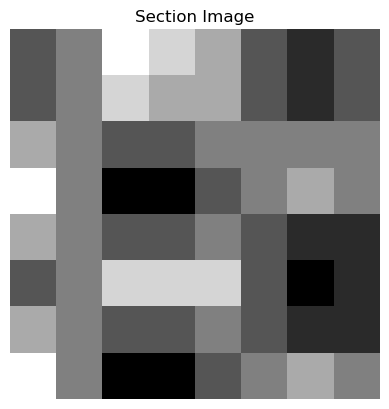

2D DCT Result:
[[ 1.25350000e+03  3.83789086e+00 -1.35299025e-01  1.81652678e+00
   1.50000000e+00 -9.63898083e-01  3.26640741e-01  1.08015032e+00]
 [ 1.53190444e+00 -1.32047656e-01 -2.66514580e+00 -3.19030566e+00
  -3.77895612e-01  2.35892824e-02  7.31385956e-01  2.59699003e-01]
 [ 8.04995032e-01  1.50336222e-01 -1.33210678e+00 -1.77185036e+00
  -2.30969883e-01  1.57352629e-01  4.48223305e-01  2.24994056e-01]
 [ 1.20865080e-01  2.69903675e+00 -6.32347630e+00 -3.93026677e+00
   4.79459254e-01 -6.81642713e-01  9.50647430e-01  2.29910624e-01]
 [-2.50000000e-01 -7.97860262e-01  3.61626180e+00  2.17045852e+00
  -2.50000000e-01  7.24366525e-01 -4.15512481e-01 -5.31221522e-02]
 [-3.30990732e-02 -3.20900882e-01  1.38393312e+00  9.52240763e-01
  -4.25793145e-02  3.39276510e-01 -1.84193639e-01 -1.41953510e-01]
 [ 1.29014844e+00 -5.78457560e-01 -8.01776695e-01 -6.40728862e-01
   9.56708581e-02  1.27448895e-01  8.21067812e-02 -3.42533054e-02]
 [-8.73249601e-01  3.93582479e-01  1.47783776e-01  3.1

In [5]:
section_img = Image.open("/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/sections/section_1.tiff")
plt.imshow(section_img, cmap='gray')
plt.title('Section Image')
plt.axis('off')  # Hide axes
plt.show()

img_array = np.array(section_img)
# img_array = np.array(img)
dct_array = dct(dct(img_array.T, norm='ortho').T, norm='ortho')

print("2D DCT Result:")
print(dct_array)

In [68]:
# section_img = Image.open("/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/sections/section_1.tiff")
# img_array = np.array(section_img)
# dct_array = dct(dct(img_array.T, norm='ortho').T, norm='ortho')

Enter an integer between 0 and 63:  23


DCT Array
 [[ 1.25350000e+03  3.83789086e+00 -1.35299025e-01  1.81652678e+00
   1.50000000e+00 -9.63898083e-01  3.26640741e-01  1.08015032e+00]
 [ 1.53190444e+00 -1.32047656e-01 -2.66514580e+00 -3.19030566e+00
  -3.77895612e-01  2.35892824e-02  7.31385956e-01  2.59699003e-01]
 [ 8.04995032e-01  1.50336222e-01 -1.33210678e+00 -1.77185036e+00
  -2.30969883e-01  1.57352629e-01  4.48223305e-01  2.24994056e-01]
 [ 1.20865080e-01  2.69903675e+00 -6.32347630e+00 -3.93026677e+00
   4.79459254e-01 -6.81642713e-01  9.50647430e-01  2.29910624e-01]
 [-2.50000000e-01 -7.97860262e-01  3.61626180e+00  2.17045852e+00
  -2.50000000e-01  7.24366525e-01 -4.15512481e-01 -5.31221522e-02]
 [-3.30990732e-02 -3.20900882e-01  1.38393312e+00  9.52240763e-01
  -4.25793145e-02  3.39276510e-01 -1.84193639e-01 -1.41953510e-01]
 [ 1.29014844e+00 -5.78457560e-01 -8.01776695e-01 -6.40728862e-01
   9.56708581e-02  1.27448895e-01  8.21067812e-02 -3.42533054e-02]
 [-8.73249601e-01  3.93582479e-01  1.47783776e-01  3.17400

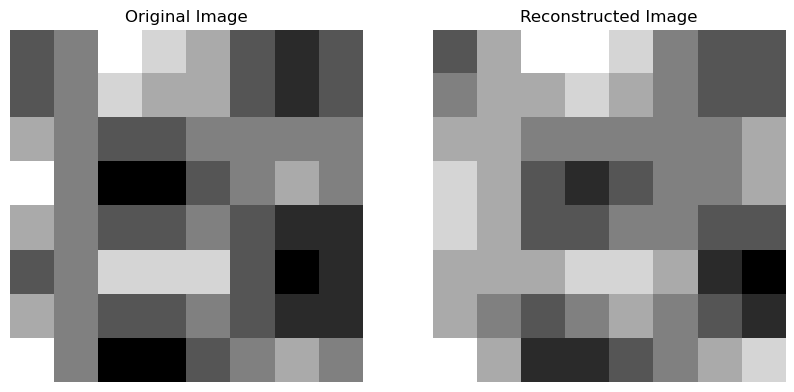

In [9]:
def get_zigzag_indices(n):
    indices = np.zeros((n, n), dtype=int)
    index = 0
    for diag in range(2 * n - 1):
        if diag % 2 == 0:
            # Even diagonal - traverse up-right
            r = min(diag, n - 1)
            c = diag - r
            while r >= 0 and c < n:
                indices[r, c] = index
                index += 1
                r -= 1
                c += 1
        else:
            # Odd diagonal - traverse down-left
            c = min(diag, n - 1)
            r = diag - c
            while c >= 0 and r < n:
                indices[r, c] = index
                index += 1
                r += 1
                c -= 1
    return indices

def create_modified_array(original_array, input_index):
    n = original_array.shape[0]
    zigzag_indices = get_zigzag_indices(n)
    max_index = min(input_index, n*n - 1)
   
    new_array = np.zeros_like(original_array)
    for i in range(n):
        for j in range(n):
            if zigzag_indices[i, j] <= max_index:
                new_array[i, j] = original_array[i, j]
            else:
                new_array[i, j] = 0
               
    return new_array

def get_user_input():
    while True:
        try:
            # Ask user for an integer input between 0 and 63
            user_input = int(input("Enter an integer between 0 and 63: "))
            if 0 <= user_input <= 63:
                return user_input
            else:
                print("Invalid input. Please enter a number between 0 and 63.")
        except ValueError:
            print("Invalid input. Please enter a valid integer between 0 and 63.")

# Initialize the original array
# original_array = np.arange(64).reshape(8, 8)
original_array = dct_array  # Assuming dct_array is defined earlier in your script

# Get user input
user_input = get_user_input()

# Create the modified array
modified_array = create_modified_array(original_array, user_input)

# Print the actual DCT array
print("DCT Array\n",dct_array)
print("\n")
# Print the modified array
print("Modified Array\n",modified_array)




#######################################################################################################

# Function to perform 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# dct_coefficients=modified_array

# Perform the IDCT
reconstructed_image = idct2(modified_array)

# Ensure the reconstructed image is in the valid range (0-255) and of type uint8
reconstructed_image = np.clip(reconstructed_image, 0, 255)
reconstructed_image = reconstructed_image.astype(np.uint8)

# print(reconstructed_image)

# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
ax[0].imshow(section_img, cmap='gray')
# ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')  # Hide axes

# Display the reconstructed image in the second subplot
ax[1].imshow(reconstructed_image, cmap='gray')
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')  # Hide axes

# Show the figure
plt.show()
